<a href="https://colab.research.google.com/github/meghana-162001/Assignment-3/blob/main/pds_assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('diabetes.csv')


# a)
Set a seed and draw a random sample

In [2]:
np.random.seed(42)  # reproducibility
sample_df = df.sample(n=25)

Computing the statistics

In [3]:
# Sample statistics
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()

# Population statistics
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

Visual comparision (Bar Chart)

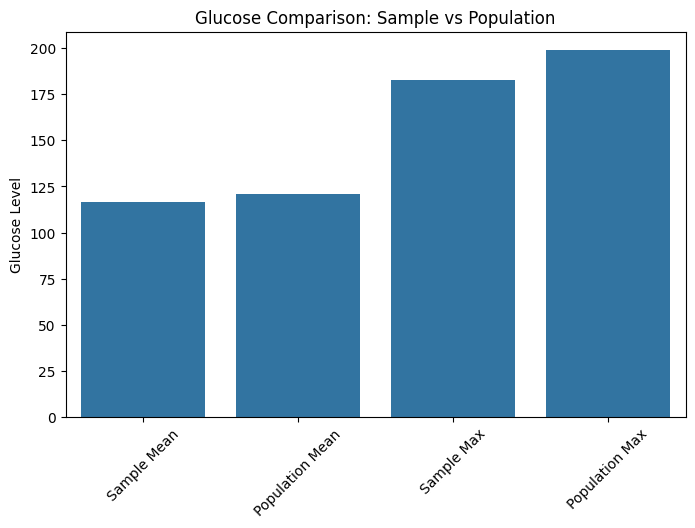

In [4]:
labels = ['Sample Mean', 'Population Mean', 'Sample Max', 'Population Max']
values = [sample_mean_glucose, pop_mean_glucose, sample_max_glucose, pop_max_glucose]

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=values)
plt.title("Glucose Comparison: Sample vs Population")
plt.ylabel("Glucose Level")
plt.xticks(rotation=45)
plt.show()

#b)
Calculating the 98th percentile

In [5]:
sample_bmi_98 = np.percentile(sample_df['BMI'], 98)
pop_bmi_98 = np.percentile(df['BMI'], 98)

Visual comparision (Bar Graph)

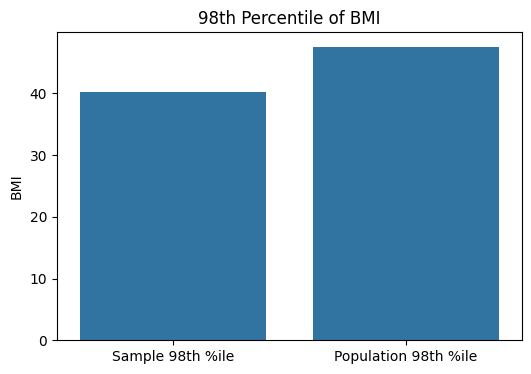

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x=['Sample 98th %ile', 'Population 98th %ile'], y=[sample_bmi_98, pop_bmi_98])
plt.title("98th Percentile of BMI")
plt.ylabel("BMI")
plt.show()

# c)
Bootstap 500 samples of size 150

In [7]:
boot_means = []
boot_stds = []
boot_percentiles = []

for _ in range(500):
    boot_sample = df.sample(n=150, replace=True)
    bp = boot_sample['BloodPressure']
    boot_means.append(bp.mean())
    boot_stds.append(bp.std())
    boot_percentiles.append(np.percentile(bp, 98))

Computing aggregated bootstrap results

In [10]:
# Aggregated bootstrap results
avg_boot_mean = np.mean(boot_means)
avg_boot_std = np.mean(boot_stds)
avg_boot_98th = np.mean(boot_percentiles)

Computing population statistics

In [11]:
pop_mean = df['BloodPressure'].mean()
pop_std = df['BloodPressure'].std()
pop_percentile = np.percentile(df['BloodPressure'], 98)

Visual Comparision (Bar Chart)

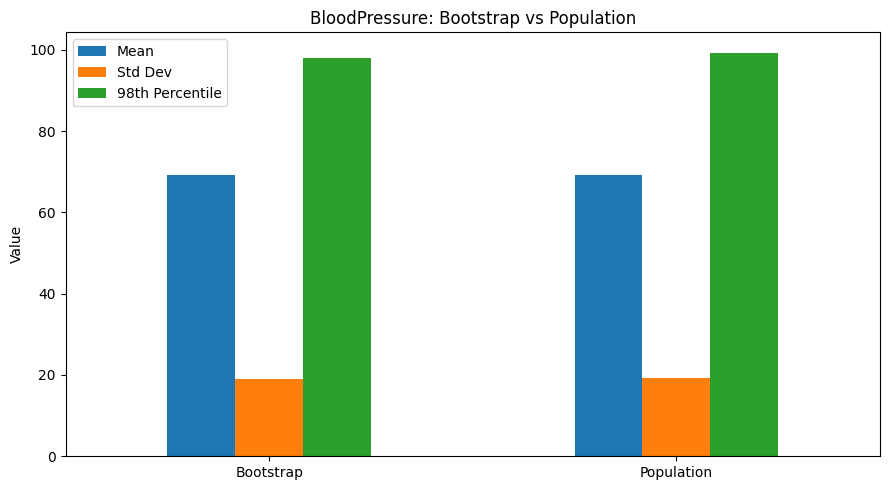

In [12]:
# Compare in chart
bp_stats_df = pd.DataFrame({
    'Mean': [avg_boot_mean, pop_mean],
    'Std Dev': [avg_boot_std, pop_std],
    '98th Percentile': [avg_boot_98th, pop_percentile]
}, index=['Bootstrap', 'Population'])

bp_stats_df.plot(kind='bar', figsize=(9, 5), title='BloodPressure: Bootstrap vs Population')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# My findings:
When I looked at the average BloodPressure values from my bootstrap samples, they were almost the same as the actual average from the full dataset. This shows that using bootstrap sampling does a great job of capturing the typical (or central) BloodPressure level in the population.

I also found that the standard deviation—the measure of how much the values vary—was very close between the bootstrap samples and the real data. So not only does the bootstrap method estimate the average well, but it also gives me a good sense of how spread out the values are.

As for the 98th percentile, which tells me what the highest values in the dataset look like, the bootstrap estimate was a little higher than the real one. That’s not too surprising, since percentiles near the extreme ends tend to fluctuate more depending on the sample. Still, the estimate was close enough to be useful.